In [2]:
import boto3
import pandas as pd
import traceback

# AWS credentials and S3 bucket details
#access_key = 'your_access_key'
#secret_key = 'your_secret_key'
bucket_name = 'amazonsagemakers'
folder_path = ''
csv_file_name = 'amazon.csv'

# Create a session using your AWS credentials
session = boto3.Session()

# Create an S3 client using the session
s3_client = session.client('s3')

# Specify the S3 object key (file path)
s3_object_key = folder_path + '/' + csv_file_name

# Read the CSV file directly from S3 into a Pandas DataFrame
try:
    response = s3_client.get_object(Bucket=bucket_name, Key=csv_file_name)
    csv_data = response['Body'].read().decode('utf-8')
    csv_file_path = "data.csv"
    with open(csv_file_path, "w") as file:
        file.write(csv_data)
    df = pd.read_csv(csv_file_path)
except Exception as e:
    print(traceback.format_exc())
    print('Error:', str(e))

In [4]:
print(df.head())

   product_id                                       product_name   
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...  \
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price   
0  Computers&Accessories|Accessories&Peripherals|...              399  \
1  Computers&Accessories|Accessories&Peripherals|...              199   
2  Computers&Accessories|Accessories&Peripherals|...              199   
3  Computers&Accessories|Accessories&Peripherals|...              329   
4  Computers&Accessories|Accessories&Peripherals|...              154   

  actual_price discount_percentage rating rating_count   
0        1,099                 64%    4.2       24,269  \
1          349                 43%  

In [5]:
columns_to_drop = ['about_product', 'review_title', 'review_content', 'img_link', 'product_link']
df.drop(columns_to_drop, axis=1, inplace=True)


In [6]:
# Create a new DataFrame
new_df = df.copy()

In [7]:
# Perform exploratory data analysis on the new DataFrame
# Example analysis: Print the summary statistics
summary_stats = new_df.describe()
print(summary_stats)

        product_id                                       product_name   
count         1465                                               1465  \
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price   
count                                                1465             1465  \
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...              199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count   
count          1465                1465   1465         1463  \
unique          449                  92     26         1143   
top             999                 50%    4.1        

In [8]:
# Example analysis: Count the number of unique products
unique_products = new_df['product_id'].nunique()
print("Number of unique products:", unique_products)

Number of unique products: 1351


Matplotlib is building the font cache; this may take a moment.


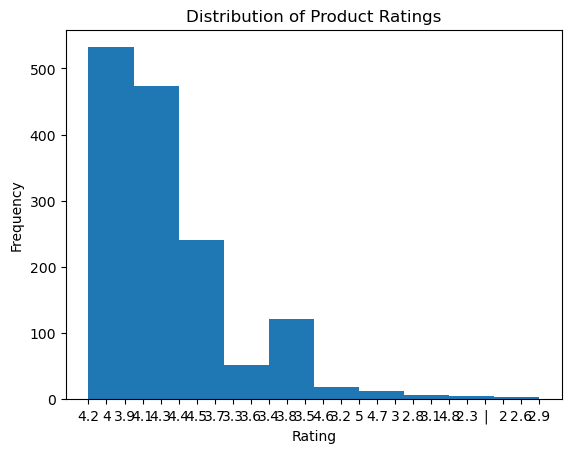

In [9]:
# Example analysis: Plot a histogram of product ratings
import matplotlib.pyplot as plt
plt.hist(new_df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

In [10]:
print(new_df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
user_id                0
user_name              0
review_id              0
dtype: int64


In [11]:
print("Number of rows:", new_df.shape[0])
print("Number of columns:", new_df.shape[1])


Number of rows: 1465
Number of columns: 11


In [12]:
print(new_df.dtypes)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
user_id                object
user_name              object
review_id              object
dtype: object


#### Find the products with the highest discount percentage 

In [15]:
# Sort the DataFrame by discount_percentage in descending order
sorted_df = new_df.sort_values(by='discount_percentage', ascending=False)

# Get the product(s) with the highest discount percentage
highest_discount = sorted_df['discount_percentage'].max()
highest_discount_products = sorted_df[sorted_df['discount_percentage'] == highest_discount]

# Print the product(s) with the highest discount percentage
print(highest_discount_products)


     product_id                                       product_name   
695  B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...  \

                                              category discounted_price   
695  Computers&Accessories|Accessories&Peripherals|...              294  \

    actual_price discount_percentage rating rating_count   
695        4,999                 94%    4.3        4,426  \

                                               user_id   
695  AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...  \

                                             user_name   
695  Naga Sai Gadagottu,Neha Sharma,Amazon Customer...  \

                                             review_id  
695  R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...  


#### Calculate the average discounted prices

In [17]:
import pandas as pd

# Convert "discounted_price" column to numeric
new_df['discounted_price'] = pd.to_numeric(new_df['discounted_price'], errors='coerce')

# Calculate the average discounted price
average_discounted_price = new_df['discounted_price'].mean()

# Print the average discounted price
print("Average Discounted Price:", average_discounted_price)


Average Discounted Price: 422.86193236714973


#### Products with Highest Rating

In [20]:
# Sort the DataFrame by rating in descending order
sorted_df = new_df.sort_values(by='rating', ascending=False)

# Get the product(s) with the highest rating
highest_rating_products = sorted_df[sorted_df['rating'] == sorted_df['rating'].max()]

# Print the product(s) with the highest rating
print(highest_rating_products)


      product_id                                       product_name   
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...  \

                                               category  discounted_price   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...               NaN  \

     actual_price discount_percentage rating rating_count   
1279        2,499                 16%      |          992  \

                                                user_id   
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...  \

                                              user_name   
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...  \

                                              review_id  
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...  


#### A scatter plot to analyze the relationship between discounted price and rating

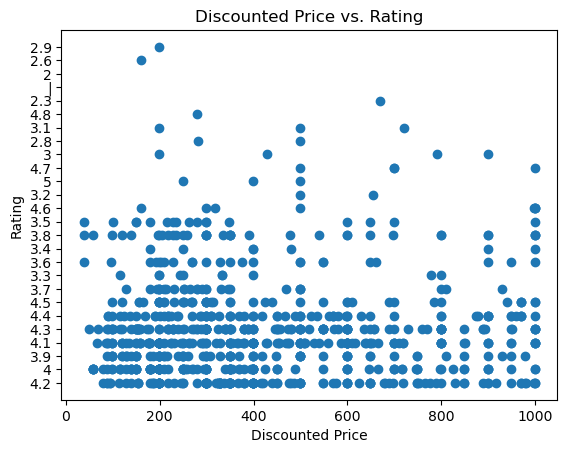

In [23]:
plt.scatter(new_df['discounted_price'], new_df['rating'])
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Discounted Price vs. Rating')
plt.show()

#### Lowest Discount given to a product

In [30]:
# Find the lowest discount percentage
lowest_discount_percentage = new_df['discount_percentage'].min()

# Filter the DataFrame for the product(s) with the lowest discount percentage
lowest_discount_products = new_df[new_df['discount_percentage'] == lowest_discount_percentage]

# Print the product(s) with the lowest discount percentage
print(lowest_discount_products)


      product_id                                       product_name   
33    B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...  \
138   B071VMP1Z4  LRIPL Compatible Sony Bravia LCD/led Remote Wo...   
264   B09LQQYNZQ                           Realme Smart TV Stick 4K   
321   B084872DQY  Mi 80 cm (32 inches) HD Ready Android Smart LE...   
339   B0B3CPQ5PF  OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...   
340   B0B3CQBRB4  OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...   
406   B0B3D39RKV  OnePlus Nord 2T 5G (Jade Fog, 12GB RAM, 256GB ...   
466   B01F25X6RQ  Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...   
539   B08BQ947H3  LIRAMARK Webcam Cover Slide, Ultra Thin Laptop...   
616   B07KCMR8D6  Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
637   B0846D5CBP  Casio FX-991ES Plus-2nd Edition Scientific Cal...   
703   B00R1P3B4O  Fujifilm Instax Mini Single Pack 10 Sheets Ins...   
710   B08TDJNM3G  E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...   
739   